In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
all_sales = pd.read_csv('./data/all_data.csv')

In [3]:
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
all_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [5]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
all_sales.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
sales_data = all_sales.dropna(how='all')

In [8]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors = 'coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors = 'coerce')
sales_data['Sale'] = sales_data['Quantity Ordered'] * sales_data['Price Each']
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Month'] = sales_data['Order Date'].dt.month

/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_60770/592014633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors = 'coerce')
/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_60770/592014633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors = 'coerce')
/var/folders/7d/26xjnnps5_5b17xfxzmcg7v40000gn/T/ipykernel_60770/592014633

In [10]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2.99,6
186846,222906,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",149.99,6
186847,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",11.95,6
186848,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",11.95,6


In [11]:
sales_data['City'] = sales_data['Purchase Address'].str.split(' ').apply(lambda x:x[-2])
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sale,Month,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,12,NY
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,12,NY
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,12,NY
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,12,CA
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,GA
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",2.99,6,MA
186846,222906,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",149.99,6,NY
186847,222907,USB-C Charging Cable,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",11.95,6,CA
186848,222908,USB-C Charging Cable,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",11.95,6,CA


In [12]:
info_per_product = sales_data.groupby("Product").sum()
info_per_product 

,Quantity Ordered,Price Each,Sale,Month
Product,,,,
20in Monitor,4129.0,451068.99,454148.71,29336
27in 4K Gaming Monitor,6244.0,2429637.70,2435097.56,44440
27in FHD Monitor,7550.0,1125974.93,1132424.50,52558
34in Ultrawide Monitor,6199.0,2348718.19,2355558.01,43304
AA Batteries (4-pack),27635.0,79015.68,106118.40,145558
AAA Batteries (4-pack),31017.0,61716.59,92740.83,146370
Apple Airpods Headphones,15661.0,2332350.00,2349150.00,109477
Bose SoundSport Headphones,13457.0,1332366.75,1345565.43,94113
Flatscreen TV,4819.0,1440000.00,1445700.00,34224


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Quantity Ordered'),
 Text(0.5, 1.0, 'Quantity Ordered Per Product')]

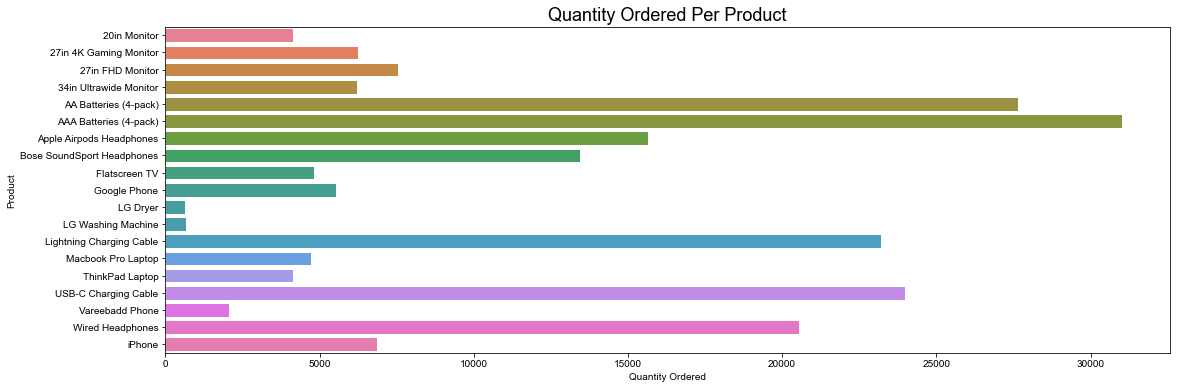

In [13]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
#set the color 
color = sns.color_palette('husl', len(info_per_product.index))
sns.set(font_scale=1.5) 
sns.barplot(info_per_product['Quantity Ordered'], info_per_product.index, palette = color,ax=ax)
ax.set(xlabel='Quantity Ordered', title='Quantity Ordered Per Product')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Sales'), Text(0.5, 1.0, ' Per Product')]

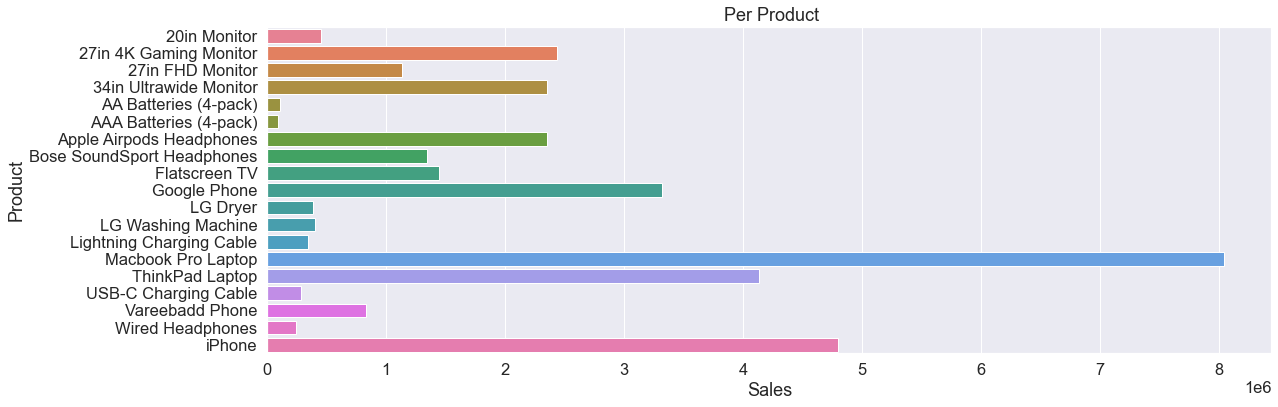

In [14]:
fig, ax = plt.subplots(1,1, figsize=(18, 6))
#set the color 
color = sns.color_palette('husl', len(info_per_product.index))
sns.set(font_scale=1.5) 
sns.barplot(info_per_product['Sale'], info_per_product.index, palette = color,ax=ax)
ax.set(xlabel='Sales', title=' Per Product')

In [16]:
info_per_month = sales_data.groupby("Month").sum()
info_per_month 

,Quantity Ordered,Price Each,Sale
Month,,,
1,10903.0,1811768.38,1822256.73
2,13449.0,2188884.72,2202022.42
3,17005.0,2791207.83,2807100.38
4,20558.0,3367671.02,3390670.24
5,18667.0,3135125.13,3152606.75
6,15253.0,2562025.61,2577802.26
7,16072.0,2632539.56,2647775.76
8,13448.0,2230345.42,2244467.88
9,13109.0,2084992.09,2097560.13


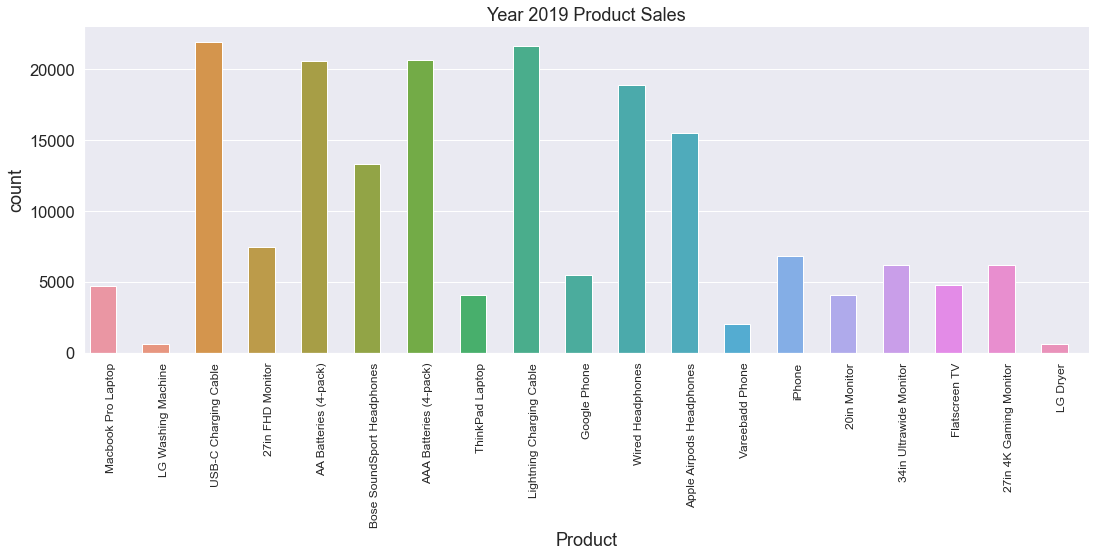

In [15]:
fig, ax = plt.subplots(figsize = (18,6))
plt.style.use('seaborn-colorblind')
sns.countplot(x = 'Product', data = sales_data, ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 90, fontsize = 12)
plt.setp(ax.patches, width = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.set_title('Year 2019 Product Sales')
plt.show()
#USB-C Charging Cable 被订购的次数最多，AAA Batteries (4-pack)总订购量（订单数*每次订单量）最多

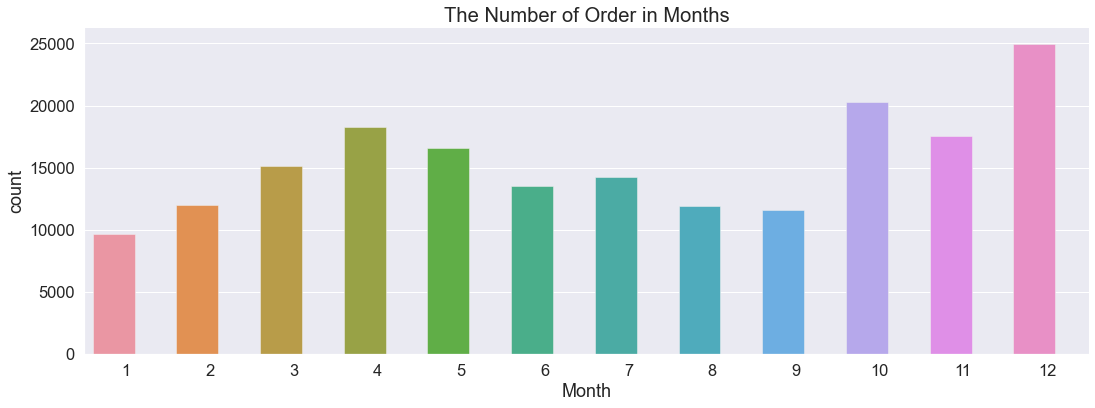

In [26]:
fig, ax = plt.subplots(figsize = (18,6))
plt.style.use('fivethirtyeight')
sns.countplot(x = 'Month', data = sales_data, ax = ax)
plt.setp(ax.patches, width = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.set_title('The Number of Order in Months')
plt.show()
#上半年4月份订单量最多，下半年12月最多，全年度12月份订单量最多，

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Sales per Product every Month')

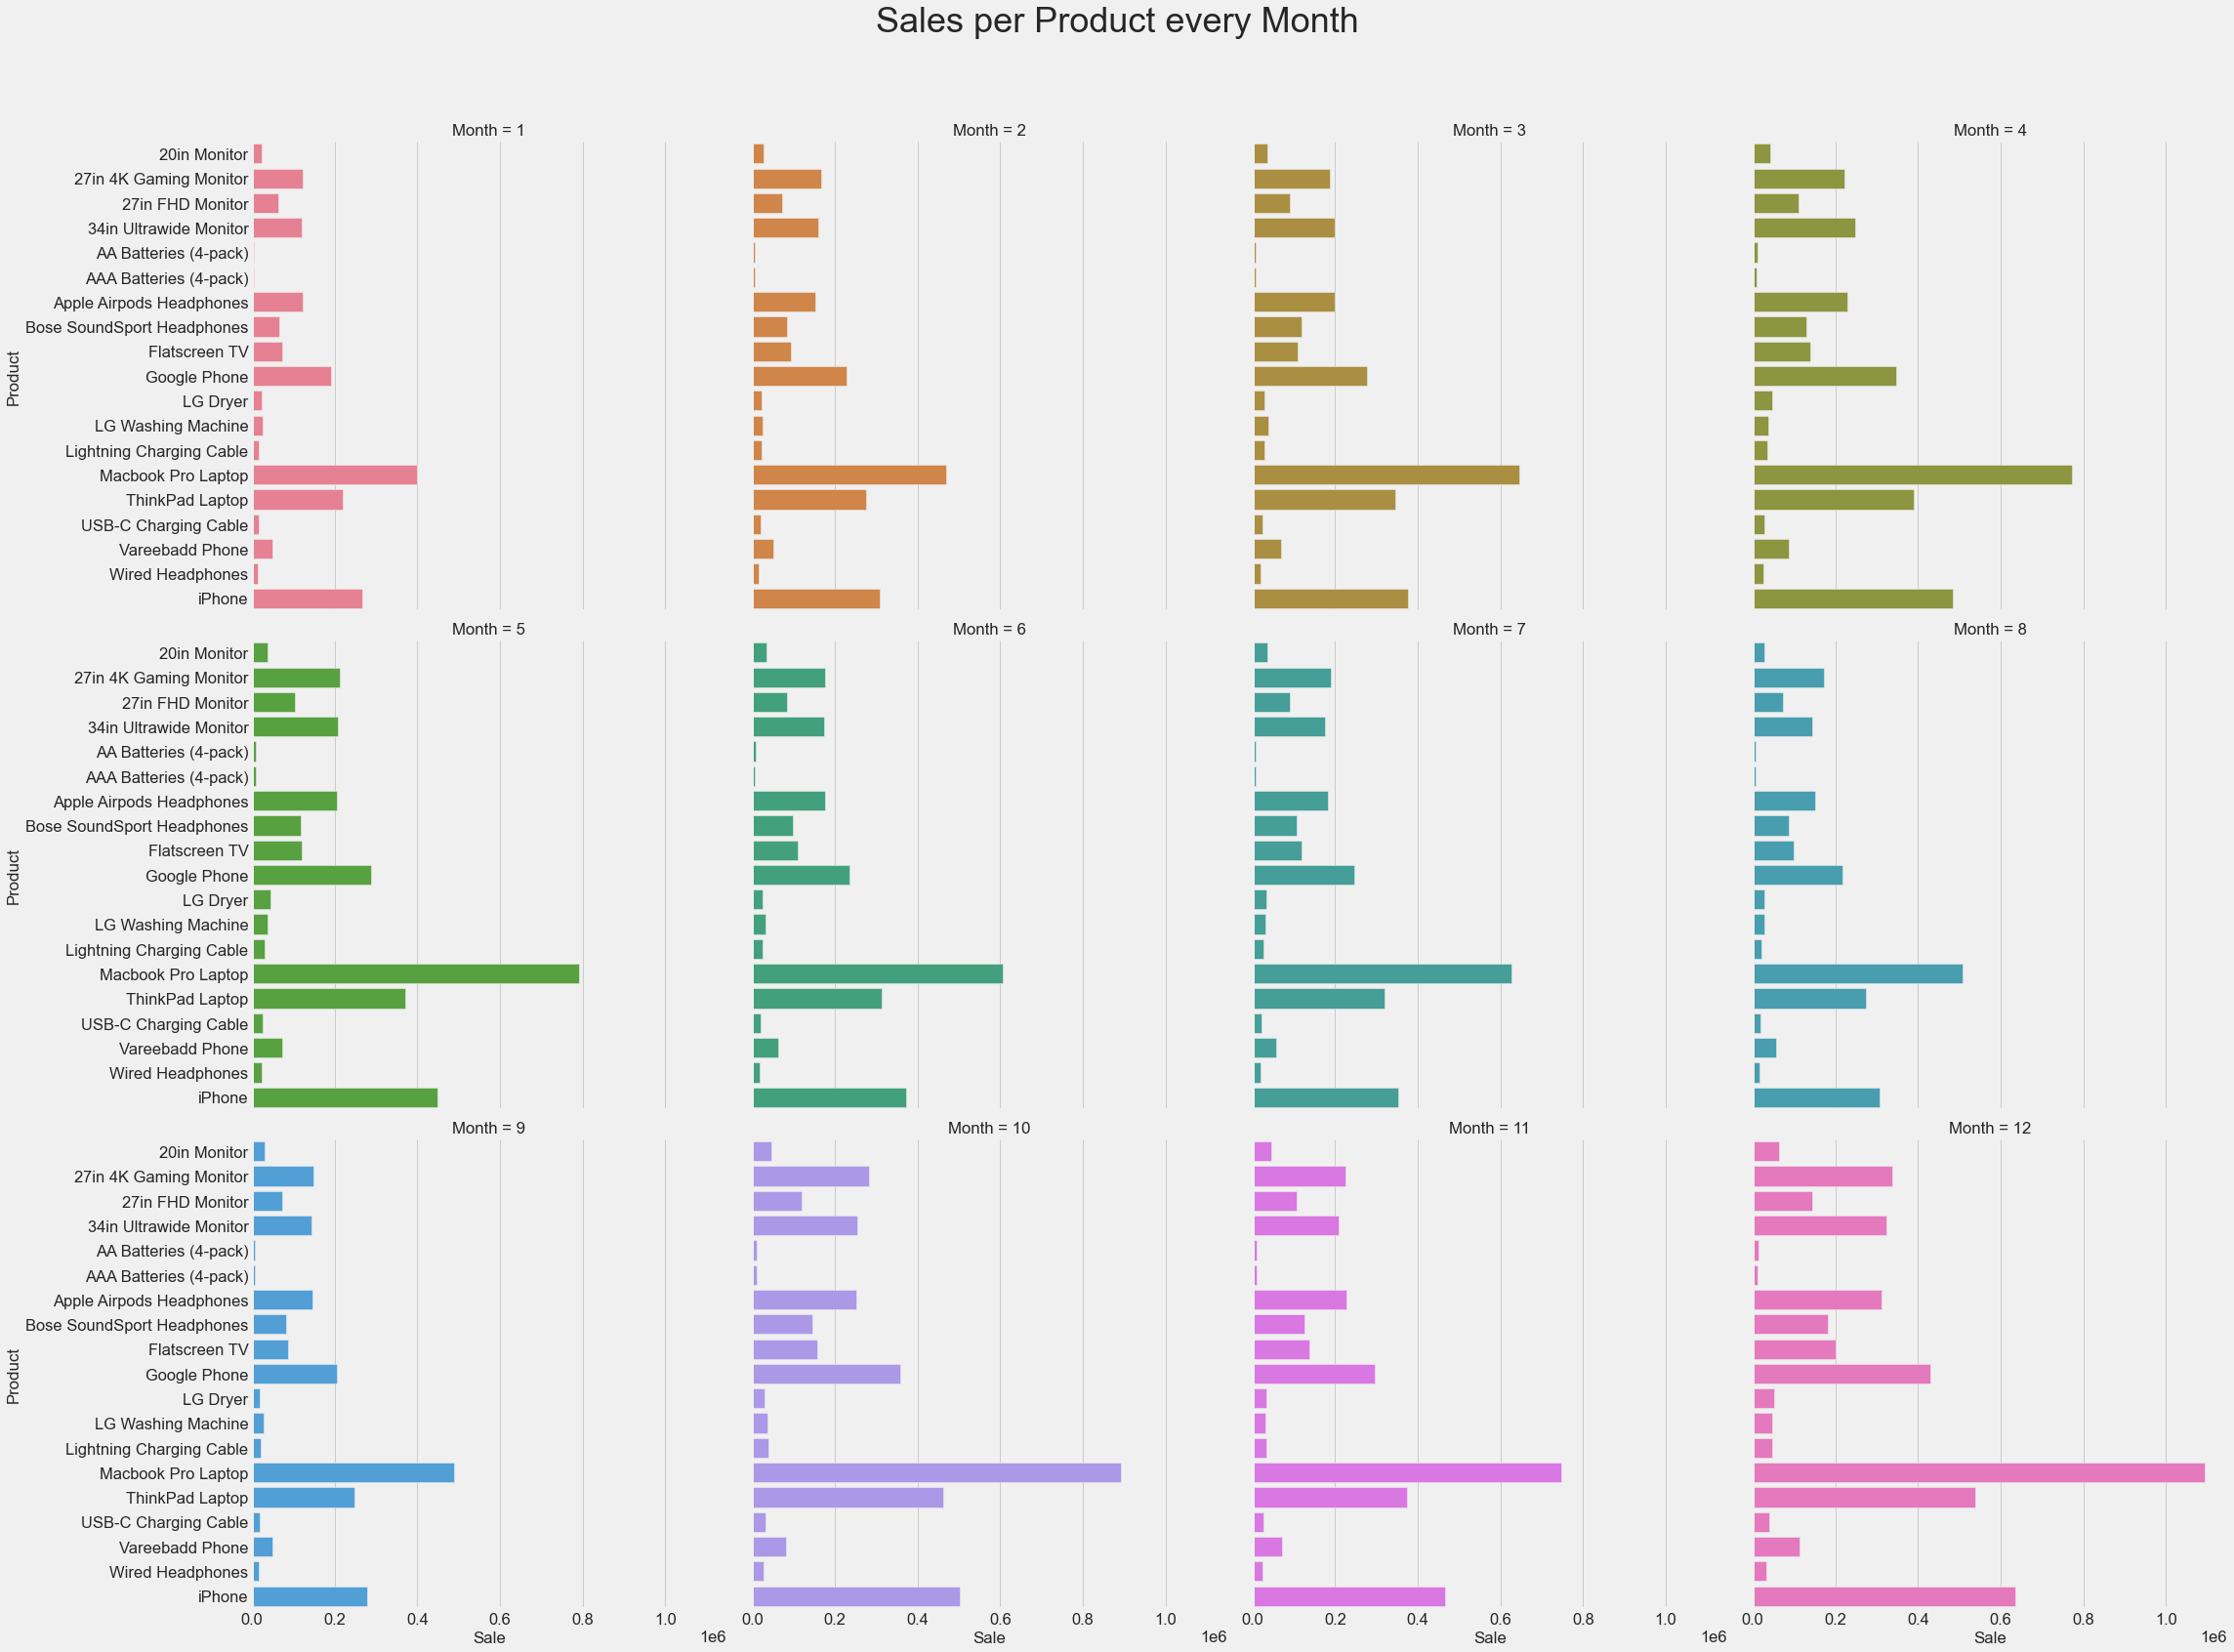

In [42]:
temp_data = sales_data.groupby(['Month', 'Product']).sum().reset_index()

ax = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
ax.map(sns.barplot, "Sale", "Product")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Sales per Product every Month', fontsize=36)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Quantity Ordered per Product every Month')

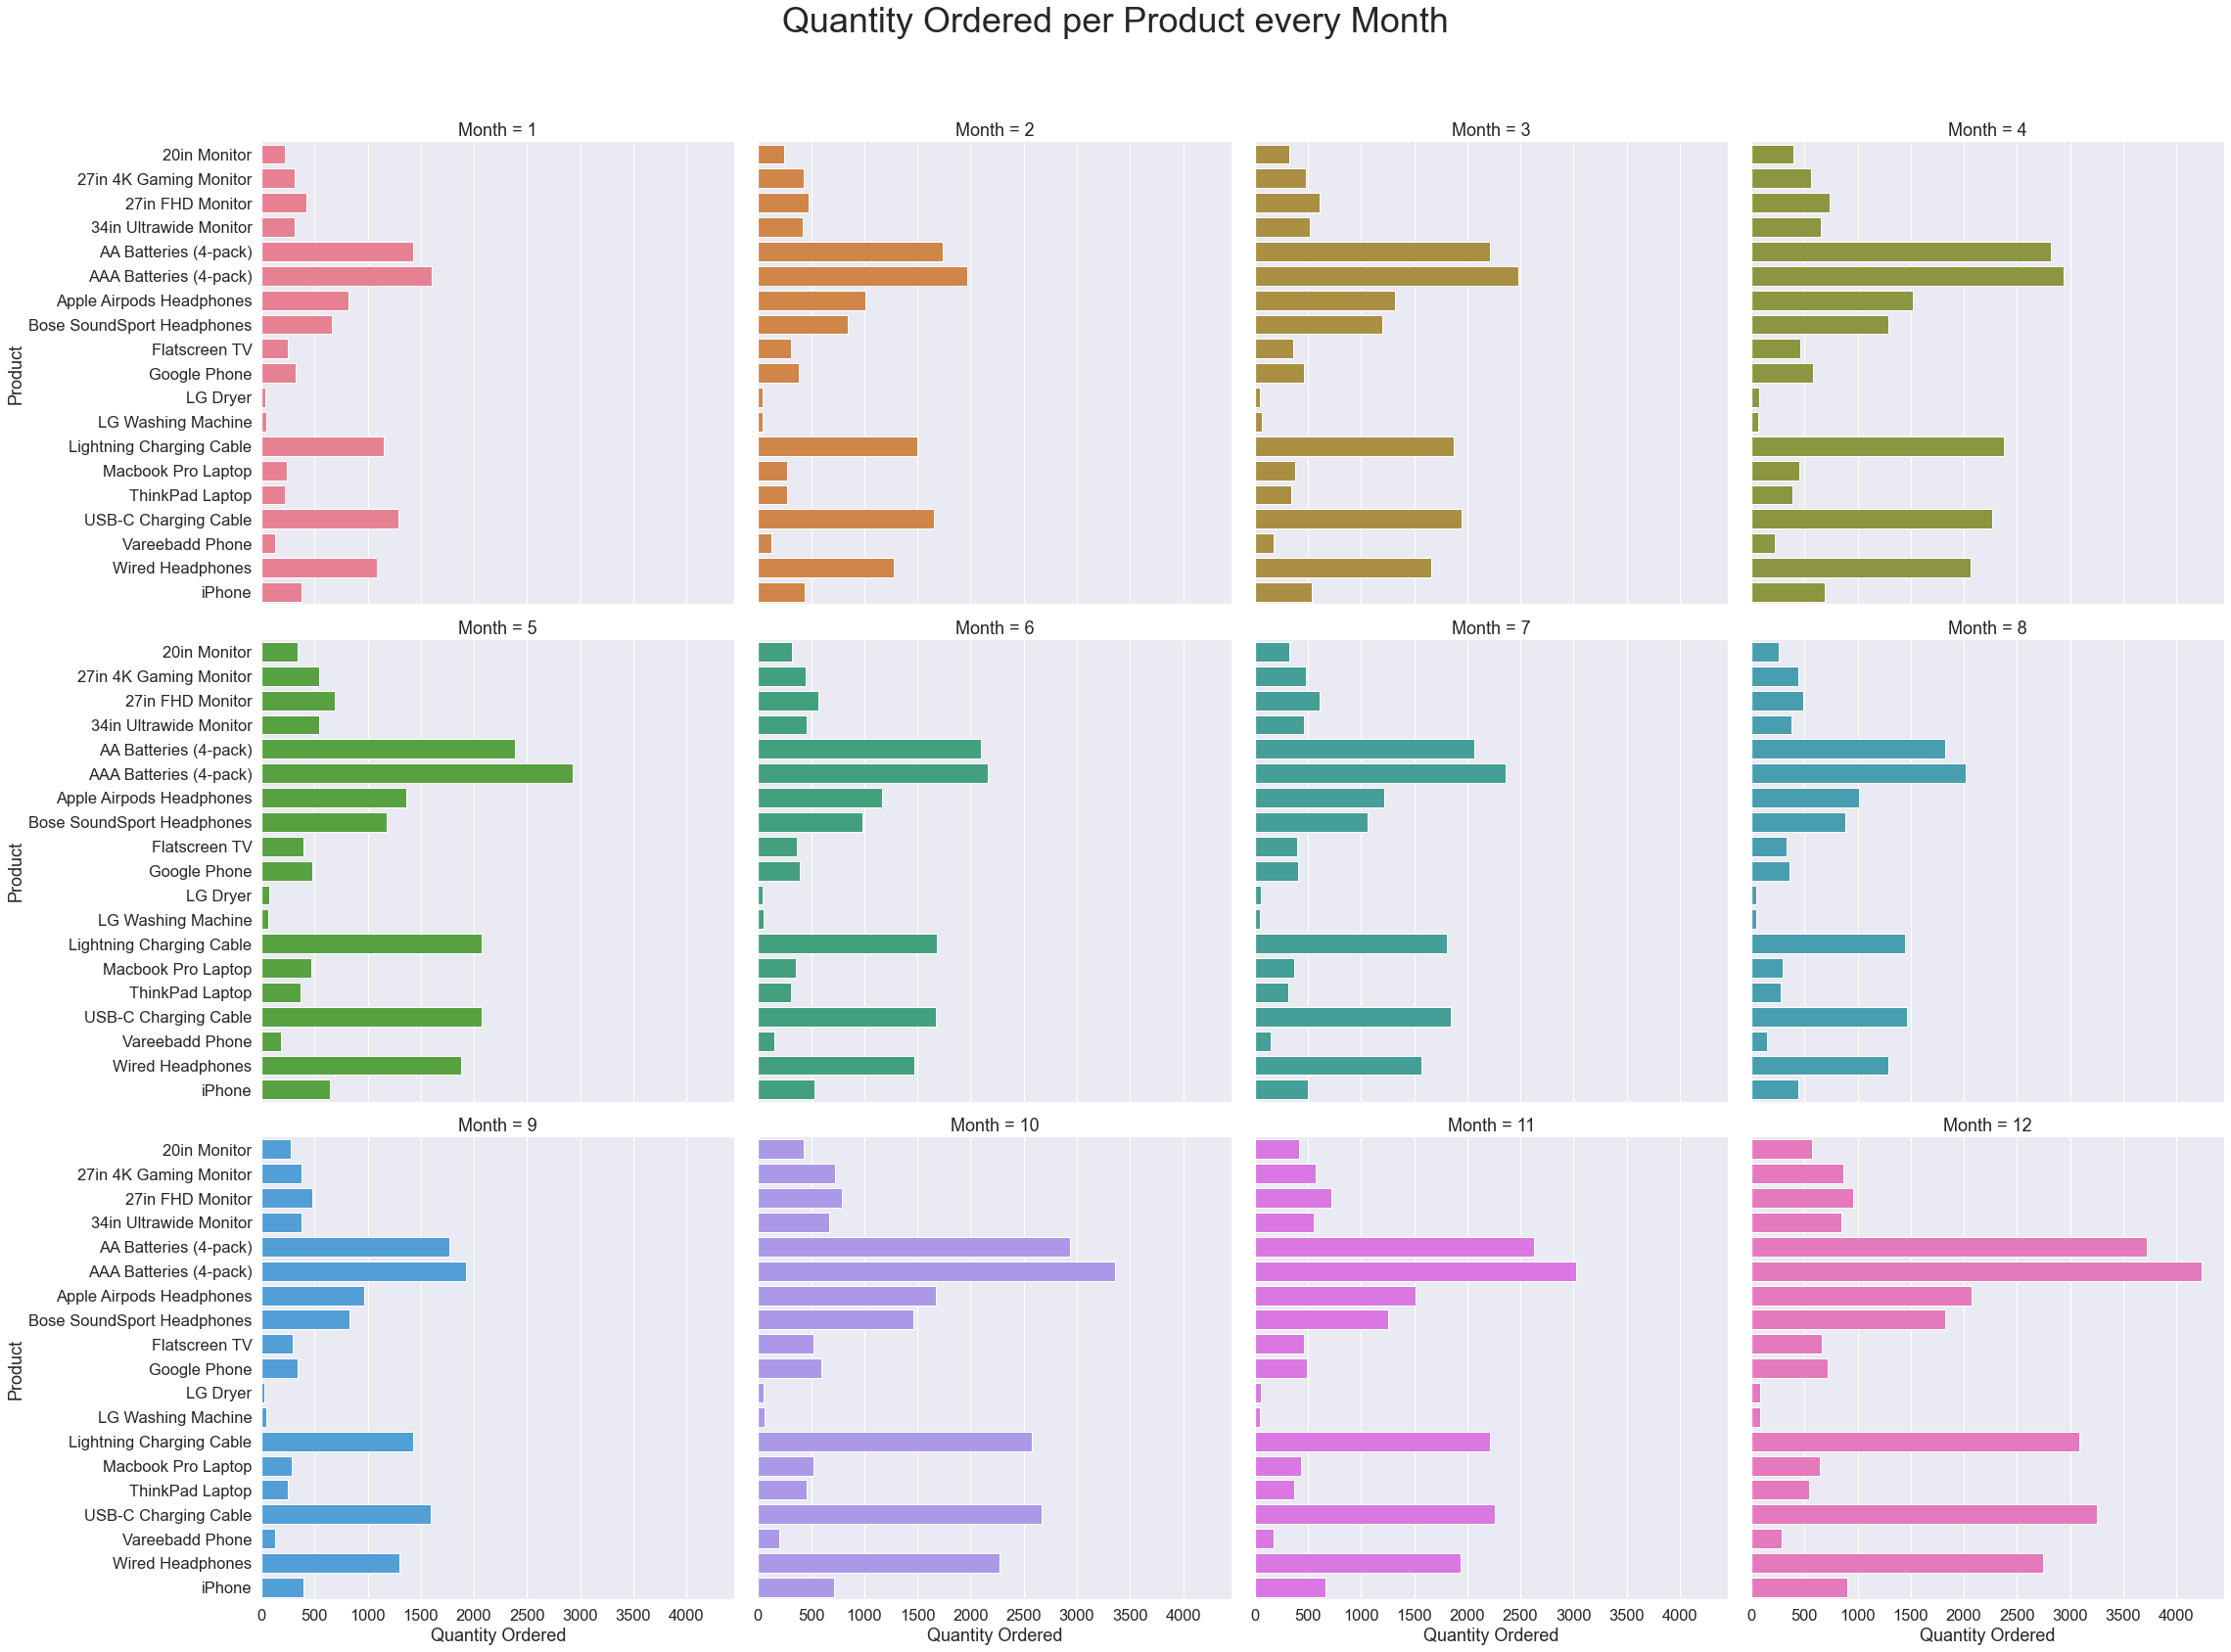

In [36]:
temp_data = sales_data.groupby(['Month', 'Product']).sum().reset_index()

ax = sns.FacetGrid(temp_data, col="Month", hue='Month', col_wrap=4, size=8)
ax.map(sns.barplot, "Quantity Ordered", "Product")
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Quantity Ordered per Product every Month', fontsize=36)